Here I have checked the 'sqft lifting' and 'sqft living' variables which have the highest accuracy and visualized the model

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # MATLAB-like way of plotting
from mpl_toolkits.mplot3d import Axes3D


# sklearn package for machine learning in python:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score



df = pd.read_csv('houseprice_data.csv')

In [2]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Coefficients:  [300.92635789 -25.8897231 ]
Intercept:  -38130.76120956906
Mean squared error: 68887535884.28610229
Coefficient of determination: 0.48


C:\Users\DELL\AppData\Local\Temp\ipykernel_10012\633211950.py:38: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax3.dist = 10


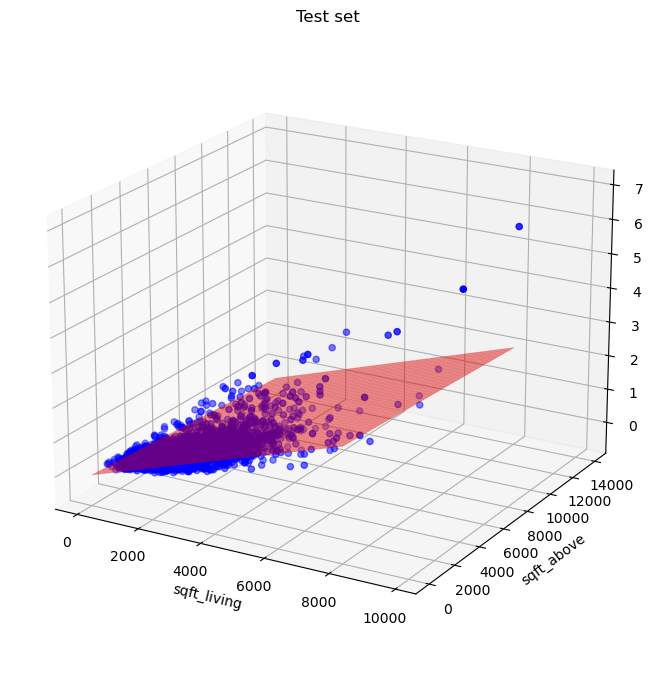

In [6]:
X = df.iloc[:, [3,10]].values    # inputs 
y = df.iloc[:, 0].values    # target


# split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
	random_state = 0)

# fit the linear least-squares regression line to the training data:
regr = LinearRegression()
regr.fit(X_train, y_train)


# The coefficients
print('Coefficients: ', regr.coef_)
# The coefficients
print('Intercept: ', regr.intercept_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, regr.predict(X_test)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, regr.predict(X_test)))


# visualise test set results in 3D with plane:
fig3 = plt.figure(figsize=(8,6))
ax3 = fig3.add_subplot(111, projection = '3d')

# plot the data
ax3.scatter(X_test[:,0], X_test[:,1], y_test, color = 'blue')

# plot the plane which represents the model
X1, X2 = np.meshgrid(range(8000), range(14000))
Z = regr.coef_[0]*X1+regr.coef_[1]*X2+regr.intercept_
ax3.plot_surface(X1, X2, Z, alpha=0.5, color='red')
ax3.azim = -60
ax3.dist = 10
ax3.elev = 20
#ax3.set_xlim(0,80)
#ax3.set_ylim(0,30)
#ax3.set_zlim(0,20)

ax3.set_title('Test set')
ax3.set_xlabel('sqft_living')
ax3.set_ylabel('sqft_above')
ax3.set_zlabel('price')

fig3.tight_layout(pad=-2.0)
fig3.savefig('LR_test_plot.png')